## PCA

Read the given csv file ('airbnb.csv')

### 1. Feature elimination: Carefully look and understad the nature of the data, remove potentially unnecessary/less useful features.

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
airbnb = pd.read_csv('airbnb.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb.drop(columns=['name', 'id', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


### 2. Data conversion
Select appropriate text features and suitably convert them into numerical features.



In [ ]:
le = LabelEncoder()
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])

le = LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,70,2,0,2,9
48891,1,28,40.70184,-73.93317,1,40,4,0,2,36
48892,2,94,40.81475,-73.94867,0,115,10,0,1,27
48893,2,95,40.75751,-73.99112,2,55,1,0,6,2


### 3. Model Training:
Train a linear regression model over the entire data. Report and maintain accuracy and time taken to train the model.

In [ ]:
lm = LinearRegression()

X = airbnb[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = airbnb['price']

In [ ]:
start_time = time.time()
lm.fit(X, y)
print
print("Time taken to train the model: %s seconds" % (time.time() - start_time))

Time taken to train the model: 0.017078399658203125 seconds


In [ ]:
predicts = lm.predict(X)
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y, predicts))))

RMSE: 229.11150567534227


### 4. Apply PCA: 
Use PCA to reduce dimensions to N = 5, 4, 3, 2, 1. Using these new features, train the a new model again. Report and maintain accuracy and time taken to train each the model and also the time taken for PCA for each 'N' value.

In [ ]:
features = []
RMSE = []
fit_time = []
PCA_time = []
for i in [9,8,7,6,5,4,3,2,1]:
  print("Number of features: ", i)
  features.append(i)
  pca = PCA(n_components=i)
  start_time = time.time()
  pca.fit(X)
  PCA_time.append(time.time() - start_time)
  x_train = pca.transform(X)
  x_test = pca.transform(X)
  lm = LinearRegression()
  start_time = time.time()
  lm.fit(x_train, y)
  fit_time.append(time.time() - start_time)
  predicts = lm.predict(x_test)
  RMSE.append(np.sqrt(metrics.mean_squared_error(y, predicts)))
  print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y, predicts))))

Number of features:  9
RMSE: 229.11150567534227
Number of features:  8
RMSE: 230.74967655556304
Number of features:  7
RMSE: 230.75704821690397
Number of features:  6
RMSE: 238.11005855724804
Number of features:  5
RMSE: 238.2164290650694
Number of features:  4
RMSE: 238.24995054052727
Number of features:  3
RMSE: 238.31253130172797
Number of features:  2
RMSE: 238.82334937128087
Number of features:  1
RMSE: 239.37638566770045


### 5. Visualisation 
5.1 Plot a graph, for number of features vs accuracy

5.2 Plot a graph, for time spend on training models [excluding the PCA time] vs accuracy

5.3 Plot a graph, for time spend on training models [including the PCA time] vs accuracy

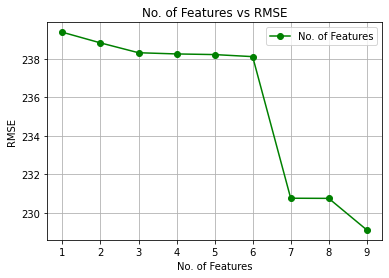

In [ ]:
plt.plot(features, RMSE, '-o', color='green', label='No. of Features')
plt.xlabel('No. of Features')
plt.ylabel('RMSE')
plt.title('No. of Features vs RMSE')
plt.grid()
plt.legend()
plt.show()

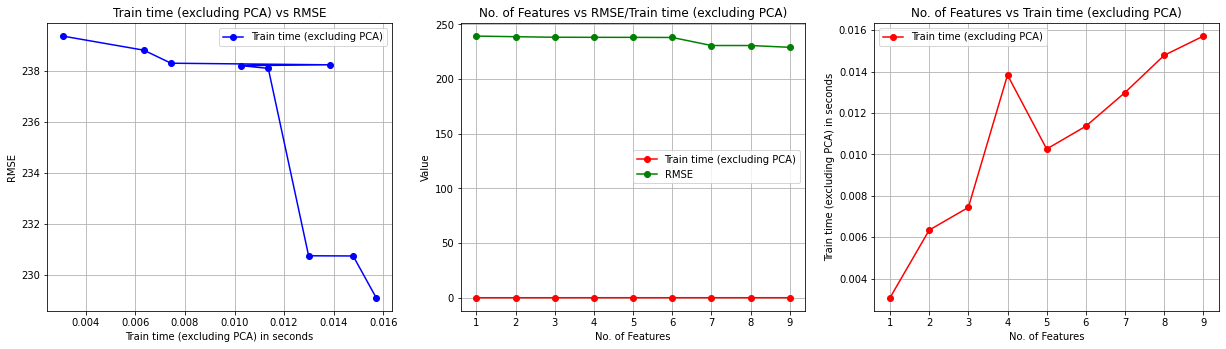

In [ ]:
plt.figure(figsize=(21, 18))

plt.subplot(3, 3, 1)
temp = sorted(list(zip(fit_time, RMSE)), key=lambda x: x[1])
plt.plot(fit_time, RMSE, '-o', color='blue', label='Train time (excluding PCA)')
plt.xlabel('Train time (excluding PCA) in seconds')
plt.ylabel('RMSE')
plt.title('Train time (excluding PCA) vs RMSE')
plt.grid()
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(features, fit_time, '-o', color='red', label='Train time (excluding PCA)')
plt.plot(features, RMSE, '-o', color='green', label='RMSE')
plt.xlabel('No. of Features')
plt.ylabel('Value')
plt.title('No. of Features vs RMSE/Train time (excluding PCA)')
plt.grid()
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(features, fit_time, '-o', color='red', label='Train time (excluding PCA)')
plt.ylabel('Train time (excluding PCA) in seconds')
plt.xlabel('No. of Features')
plt.title('No. of Features vs Train time (excluding PCA)')
plt.grid()
plt.legend()

plt.show()

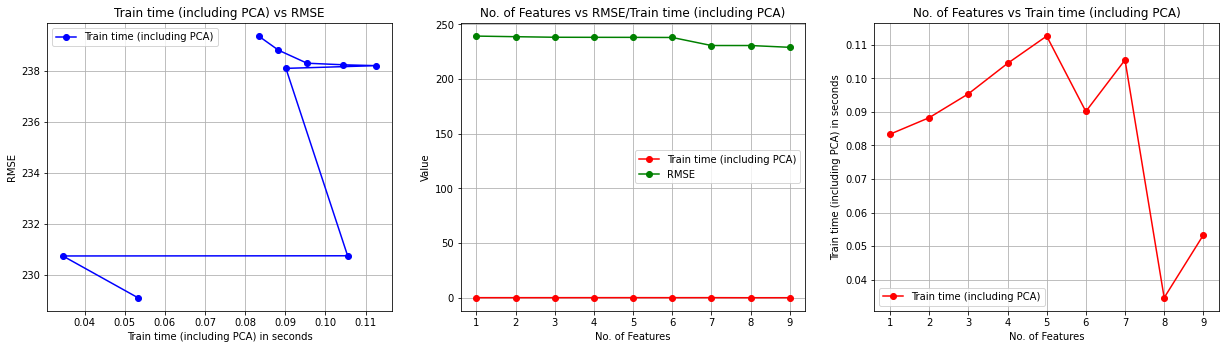

In [ ]:
total_time = [sum(i) for i in zip(PCA_time, fit_time)]

plt.figure(figsize=(21, 18))

plt.subplot(3, 3, 1)
temp = sorted(list(zip(total_time, RMSE)), key=lambda x: x[1])
plt.plot(total_time, RMSE, '-o', color='blue', label='Train time (including PCA)')
plt.xlabel('Train time (including PCA) in seconds')
plt.ylabel('RMSE')
plt.title('Train time (including PCA) vs RMSE')
plt.grid()
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(features, total_time, '-o', color='red', label='Train time (including PCA)')
plt.plot(features, RMSE, '-o', color='green', label='RMSE')
plt.xlabel('No. of Features')
plt.ylabel('Value')
plt.title('No. of Features vs RMSE/Train time (including PCA)')
plt.grid()
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(features, total_time, '-o', color='red', label='Train time (including PCA)')
plt.ylabel('Train time (including PCA) in seconds')
plt.xlabel('No. of Features')
plt.title('No. of Features vs Train time (including PCA)')
plt.grid()
plt.legend()

plt.show()

### 6. Analyze 

* The first graph of No. of Feature vs RMSE shows that as we increase the number of features during the training of the model, the RMSE values reduce considerably, hence increasing the accuracy and performance of the model.

* In the second series of graphs, we can see that the train time (excluding PCA) increases considerably as we increase the number of features. Also, we can see that the RMSE values decrease as the train time (excluding PCA) increases. When the combination of RMSE and train time (excluding PCA) are considered against the number of features, there is not much significant difference.

* There are some interesting results in the third series of graphs. When the combination of RMSE and train time (including PCA) are considered against the number of features, there is not much significant difference. But interestingly, the train time (including PCA) dips with 8/9 features as compared to 1-7 features. Similarly, increased train time (including PCA) does not reduce the RMSE values, instead are considerably higher than values obtained for mediocre train time (including PCA).

Finally, in my opinion, PCA does help to realize important features driving the target variable, and losing non-important features may be fruitful in terms of optimizing space and time constraints.